In [145]:
import warnings

warnings.filterwarnings('ignore')

# Основные предположения: 
* Газ совершенный ($\gamma = const$)
* Газ полностью диссоциирует при переходе через фронт

In [2]:
from math import sqrt
from sympy import *
import matplotlib.pyplot as plt
import numpy as np
from ipywidgets import interact_manual

## Основные уравнения

$$\rho_1 v_1 = \rho_2 v_2 \;\; - \;\; \text{баланс массы}$$ 

$$p_1 + \rho_1v_1^2 = p_2 + \rho_2 v_2^2 \;\;-\;\; \text{сохранение импульса}$$

$$\frac{v_1^2}{2} + (\frac{\gamma_1}{\gamma_1 - 1})\frac{p_1}{\rho_1} = \frac{v_2^2}{2} + (\frac{\gamma_2}{\gamma_2 - 1})\frac{p_2}{\rho_2} \;\; - \;\; \text{Интеграл Бернулли}$$

$$ (\varepsilon_1 - \varepsilon_2) + \frac{1}{2}(p_2+p_1)(\frac{1}{\rho_1} - \frac{1}{\rho_2}) = 0 \;\; - \;\; \text{Адиабата Гюгонио}$$

$$M_i = \frac{v_i}{a_i} \;\; - \;\; \text{Число маха}$$

$$ a = \sqrt{\frac{\gamma p}{\rho}} \;\; - \;\; \text{Скорость звука}$$

In [3]:
# начальные данные
M1 = 5
p1 = 1*10**5
rho1 = 1.12
gamma1 = 7/5
v1 = M1 * sqrt(gamma1*p1/rho1)
mol = 0.028

In [4]:
p2, rho2, v2 = symbols('p2 rho2 v2')

In [6]:
def solve_eq(M1, gamma2):
    hi1 = gamma1/(gamma1 - 1)
    hi2 = gamma2/(gamma2 - 1)
    v1 = M1 * sqrt(gamma1*p1/rho1)
    ans = nonlinsolve([Eq(rho1*v1, rho2*v2), Eq(p1 + rho1*v1**2, p2 + rho2*v2**2), Eq(1/(gamma1 - 1)*p1/rho1 - 1/(gamma2 - 1)*p2/rho2 + 0.5*(p1 + p2)*(1/rho1 - 1/rho2),)], (p2, rho2, v2))
    return ans

## Постороим графики для модели, не учитывающей диссоциацию

In [149]:
@interact_manual(M1=(2.5, 20, 0.1))
def plot_m(M1):
    x = np.linspace(-1, 1, 500)

    gamm2 = 5/3
    ans = solve_eq(M1, gamm2)
    ans2 = solve_eq(M1, 7/5)

    plt.figure(figsize=(15, 15))
    ax = plt.subplot(321)
    plt.plot(x, [p1] * (len(x)//2) + [ans2.args[1][0]]*(len(x)//2))
    plt.title('давление без распада Гюгонио')
    plt.ylabel('Давление, Па')
    plt.text(-1, 600000, "$p_0 = ${} $*10^5$".format(p1/10**5))
    plt.text(0.1, 500000, "$p_1 = ${} $*10^5$".format(round(ans2.args[1][0] /10**5, 2)))



    plt.subplot(322)
    plt.plot(x, [rho1] * (len(x)//2) + [ans2.args[1][1]]*(len(x)//2))
    plt.title('Плотность без распада Гюгонио')
    plt.ylabel('Плотность, $кг/м^3$')
    plt.text(-1, 3, "$rho _0 = ${}".format(rho1))
    plt.text(0.1, 2, "$rho _1 = ${} ".format(round(ans2.args[1][1], 2)))

    plt.subplot(3, 2, 3)
    plt.plot(x, [v1] * (len(x)//2) + [ans2.args[1][2]]*(len(x)//2), label='Скорость потока')
    plt.plot(x, [sqrt(gamma1*p1/rho1)] * (len(x)//2) + [sqrt(gamma1*ans2.args[1][0]/ans2.args[1][1])] * (len(x)//2), label='Скорость звука')
    plt.title('Скорость без распада Гюгонио')
    plt.ylabel('Скорость, м/c')
    plt.text(-1, 600, "$v _0 = ${}".format(round(v1, 2)))
    plt.legend()
    plt.text(0.1, 1000, "$v _1 = ${} ".format(round(ans2.args[1][2], 2)))
   

    plt.subplot(3, 2, 4)
    plt.plot(x, [p1*mol/(8.31*rho1)] * (len(x)//2) + [ans2.args[1][0]*mol/(8.31*ans2.args[1][1])]*(len(x)//2))
    plt.title('Температура без распада Гюгонио')
    plt.ylabel('Температура, К')
    plt.text(-1, 1000, "$T _0 = ${}".format(round(p1*mol/(8.31*rho1), 2)))
    plt.text(0.1, 600, "$T _1 = ${} ".format(round(ans2.args[1][0]*mol/(8.31*ans2.args[1][1]), 2)))


    plt.subplot(3, 2, 5)
    plt.plot(x, [M1] * (len(x)//2) + [ans2.args[1][2] / sqrt(gamma1*ans2.args[1][0]/ans2.args[1][1])]*(len(x)//2))
    plt.title('числа маха без распада Гюгонио')
    plt.text(-1, 2.5, "$M _0 = ${}".format(round(M1, 2)))
    plt.text(0.1, 1, "$M _1 = ${} ".format(round(ans2.args[1][2] / sqrt(gamma1*ans2.args[1][0]/ans2.args[1][1]), 2)))

    plt.show()


interactive(children=(FloatSlider(value=11.200000000000001, description='M1', max=20.0, min=2.5), Button(descr…

## Построим зависимости параметров от маха для этой модели

In [150]:
r_p = []
r_t1 = []
r_rho = []
r_v = []
for x in np.arange(2.5, 13, 0.1):
    ans = solve_eq(x, 7/5)
    r_p.append(ans.args[1][0])
    r_t1.append(ans.args[1][0]*mol/(8.31*ans.args[1][1]))
    r_rho.append(ans.args[1][1])
    r_v.append(ans.args[1][2])

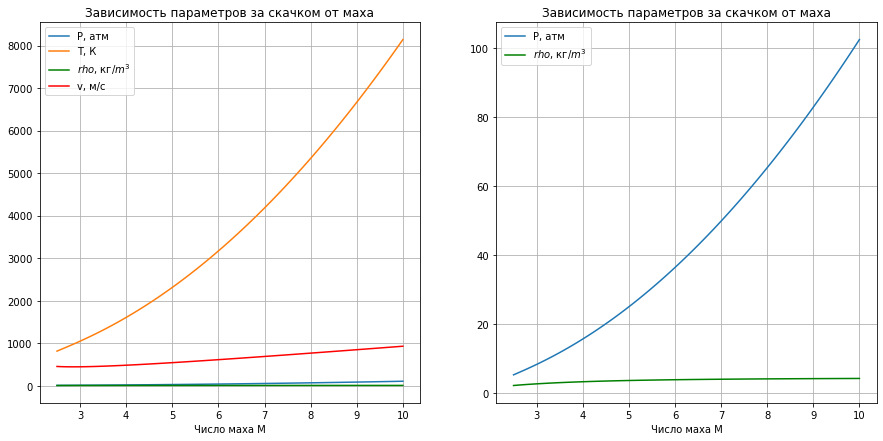

In [9]:
plt.figure(figsize=(15, 7))
plt.subplot(121)
plt.plot(l_100, np.array(r_p)/100000, label='P, атм')
plt.plot(l_100, r_t, label='T, К')
plt.plot(l_100, r_rho, label='$rho$, кг/$m^3$', color='green')
plt.plot(l_100, r_v, label='v, м/с', color='red')
plt.legend()
plt.grid(True)
plt.xlabel('Число маха М')
plt.title('Зависимость параметров за скачком от маха')


plt.subplot(122)
plt.plot(l_100, np.array(r_p)/100000, label='P, атм')
plt.plot(l_100, r_rho, label='$rho$, кг/$m^3$', color='green')
plt.legend()
plt.grid(True)
plt.title('Зависимость параметров за скачком от маха')
plt.xlabel('Число маха М')
plt.show()

# Модель с диссоциацией

In [151]:
ans = solve_eq(15, 7/5) # p, rho, v
ans.args[1]

(26233333.3333334, 6.57391304347826, 903.525331516144)

Эмперические данные

In [152]:
diss = {4500: 0.0001, 5000: 0.05, 5500: 0.13, 5750: 0.2, 6000: 0.255, 6250: 0.35, 6500: 0.45, 6750: 0.56, 7000: 0.66, 7250: 0.75, 7500: 0.81, 7750: 0.85, 8000: 0.9, 8500: 0.95, 10000: 1} # T: \alpha

In [128]:
N = 6.02*10**23  # Число Авогадро
T_start = 4500  # температура с которой начинается распад молекул
diss_mol_once = 1e19  # число диссоциирующих молекул за раз - отвечает за шаг расчета, начинает 1e9
T = float(ans.args[1][0])*mol/(8.31*float(ans.args[1][1]))
count_mol = float(ans.args[1][1])/mol * N
count_atom = 0
nu = float(ans.args[1][1])/mol
nu_ = 0
R = 8.31
dT = 942000/N * diss_mol_once

In [129]:
T

13445.796378006613

In [130]:
alpha = 0
alpha0 = 1
while T > T_start and count_mol > 0:
    i = 5 if T < 3340 else 7
    U = (i/2*R*T*nu + 3/2*R*T*nu_ - dT)  # вычисление уменьшения температуры для шага молекул
    count_atom += diss_mol_once
    count_mol -= diss_mol_once
    T = U/(i/2*R*count_mol/N + 3/2*R*count_atom/N)
    nu = count_mol / N
    nu_ = count_atom / N
    alpha = count_atom*2 / (count_atom*2 + count_mol)  # вычисляем степень диссоциации
    for j in range(len(list(diss.keys())) - 1):
        if list(diss.keys())[j] < T < list(diss.keys())[j + 1]:
            alpha0 = diss[list(diss.keys())[j]]
            break
    if alpha > alpha0:
        print(T)
        break
print('Tkon = {}, alpha = {}'.format(T, alpha))

6499.998432073813
Tkon = 6499.998432073813, alpha = 0.39000147531297696


In [131]:
V = 1
nu = count_mol / N
nu_ = count_atom / N
gamma = 9/7
gamma3 = alpha*3/2 + (1 - alpha)*gamma

## Параметры за скачком

In [132]:
p = float(ans.args[1][0])
V1 = (p*V**gamma/(nu+nu_)*1/(R*T))**(1/(gamma3-1)) # для адиабатической ставить 1 вместо выражения

p_sum = (nu+nu_)*R*T/V1

rho_sum = (nu*0.028 + nu_*0.014)/V1

v3 = rho1*v1/rho_sum
M2 = v3/sqrt(gamma3*p_sum/rho_sum)

print('M2 = {}, p2 = {}*10^5, rho2 = {}, T2 = {}, alpha = {}%'.format(M2, round(p_sum/10**5, 2), round(rho_sum, 2), round(T, 2), round(alpha*100, 2)))

M2 = 1.41497657585387, p2 = 17.72*10^5, rho2 = 0.81, T2 = 6500.0, alpha = 39.0%


In [74]:
r_p = []
r_t = []
r_rho = []
r_v = []
for x in np.arange(2.5, 13, 0.1):
    v1 = M1 * sqrt(gamma1*p1/rho1)
    ans = solve_eq(x, 7/5) # p, rho, v
    diss_mol_once = 1e19 # число диссоциирующих молекул за раз - отвечает за шаг расчета, начинает 1e9
    T = float(ans.args[1][0])*mol/(8.31*float(ans.args[1][1]))
    count_mol = float(ans.args[1][1])/mol * N
    count_atom = 0
    nu = float(ans.args[1][1])/mol
    nu_ = 0
    dT = 942000/N * diss_mol_once
    alpha = 0
    alpha0 = 1
    while T > T_start and count_mol > 0:
        i = 5 if T < 3340 else 7
        U = (i/2*R*T*nu + 3/2*R*T*nu_ - dT)  # вычисление уменьшения температуры для шага молекул
        count_atom += diss_mol_once
        count_mol -= diss_mol_once
        T = U/(i/2*R*count_mol/N + 3/2*R*count_atom/N)
        nu = count_mol / N
        nu_ = count_atom / N
        alpha = count_atom*2 / (count_atom*2 + count_mol)  # вычисляем степень диссоциации
        for j in range(len(list(diss.keys())) - 1):
            if list(diss.keys())[j] < T < list(diss.keys())[j + 1]:
                alpha0 = diss[list(diss.keys())[j]]
                break
        if alpha > alpha0:
            break
    p = float(ans.args[1][0])
    V = 1
    nu = count_mol / N
    nu_ = count_atom / N
    gamma = 9/7
    gamma3 = alpha*3/2 + (1 - alpha)*gamma
    V1 = (p*V**gamma/(nu+nu_)*1/(R*T))**(1/(gamma3-1))  # для адиабатической ставить 1 вместо выражения

    p_sum = (nu+nu_)*R*T/V1

    rho_sum = (nu*0.028 + nu_*0.014)/V1

    v4 = rho1*v1/rho_sum
    M2 = v4/sqrt(gamma3*p_sum/rho_sum)
    r_p.append(p_sum)
    r_t.append(T)
    r_rho.append(rho_sum)
    r_v.append(v4)

C:\Users\honor\anaconda3\lib\site-packages\sympy\core\relational.py:486: SymPyDeprecationWarning: 

Eq(expr) with rhs default to 0 has been deprecated since SymPy 1.5.
Use Eq(expr, 0) instead. See
https://github.com/sympy/sympy/issues/16587 for more info.

  SymPyDeprecationWarning(


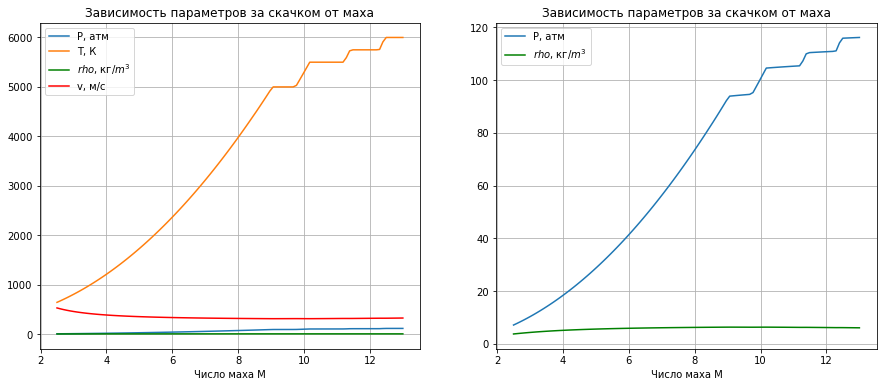

In [75]:
l_100 = np.linspace(2.5, 13, 105)
plt.figure(figsize=(15, 6))
plt.subplot(121)
plt.plot(l_100, np.array(r_p)/100000, label='P, атм')
plt.plot(l_100, r_t, label='T, К')
plt.plot(l_100, r_rho, label='$rho$, кг/$m^3$', color='green')
plt.plot(l_100, r_v, label='v, м/с', color='red')
plt.legend()
plt.grid(True)
plt.xlabel('Число маха М')
plt.title('Зависимость параметров за скачком от маха')


plt.subplot(122)
plt.plot(l_100, np.array(r_p)/100000, label='P, атм')
plt.plot(l_100, r_rho, label='$rho$, кг/$m^3$', color='green')
plt.legend()
plt.grid(True)
plt.title('Зависимость параметров за скачком от маха')
plt.xlabel('Число маха М')
plt.show()

In [142]:
p1 = 1*10**5
rho1 = 1.12
gamma1 = 7/5
v1 = M1 * sqrt(gamma1*p1/rho1)
mol = 0.028
p2, rho2, v2 = symbols('p2 rho2 v2')
r_p = []
r_t1 = []
r_rho = []
r_v = []
for x in np.arange(2.5, 13, 0.1):
    ans = solve_eq(x, 7/5)
    r_p.append(ans.args[1][0])
    r_t1.append(ans.args[1][0]*mol/(8.31*ans.args[1][1]))
    r_rho.append(ans.args[1][1])
    r_v.append(ans.args[1][2])

C:\Users\honor\anaconda3\lib\site-packages\sympy\core\relational.py:486: SymPyDeprecationWarning: 

Eq(expr) with rhs default to 0 has been deprecated since SymPy 1.5.
Use Eq(expr, 0) instead. See
https://github.com/sympy/sympy/issues/16587 for more info.

  SymPyDeprecationWarning(


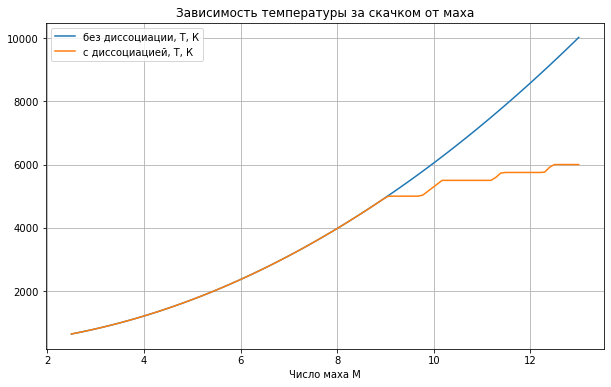

In [144]:
l_100 = np.linspace(2.5, 13, 105)
plt.figure(figsize=(10, 6))
plt.plot(l_100, r_t1, label='без диссоциации, T, К')
plt.plot(l_100, r_t, label='с диссоциацией, Т, К')
plt.legend()
plt.grid(True)
plt.xlabel('Число маха М')
plt.title('Зависимость температуры за скачком от маха')
plt.show()